In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('RSCCASN.csv',index_col='DATE',parse_dates=['DATE'])

In [3]:
data.head()

,RSCCASN
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


In [4]:
data.columns=['Sales']

<Axes: xlabel='DATE'>

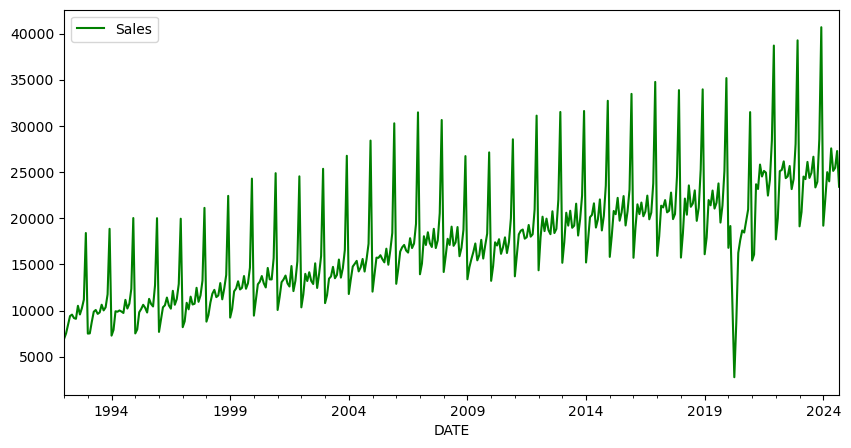

In [5]:
data.plot(figsize=(10,5),c='g')

In [6]:
#Splitting data
train_data=data.iloc[:-24]
test_data=data.iloc[-24:]

In [7]:
#Scalling Data
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
scaled_train_data=Scaler.fit_transform(train_data)
scaled_test_data=Scaler.transform(test_data)

In [8]:
#Time Series Generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
Gen_train=TimeseriesGenerator(scaled_train_data,scaled_train_data,length=12,batch_size=1)
Gen_val=TimeseriesGenerator(scaled_test_data,scaled_test_data,length=12,batch_size=1)

In [9]:
#Creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Input
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
model=Sequential()
model.add(Input(shape=(12,1)))
model.add(LSTM(128,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
early_stop=EarlyStopping(monitor='val_loss',patience=2,verbose=1)

In [14]:
model.fit(Gen_train,epochs=20,validation_data=Gen_val,callbacks=[early_stop])

Epoch 1/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0277 - val_loss: 0.0415
Epoch 2/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0164 - val_loss: 0.0180
Epoch 3/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0111 - val_loss: 0.0059
Epoch 4/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0064 - val_loss: 0.0015
Epoch 5/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0057 - val_loss: 0.0127
Epoch 6/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 6: early stopping


In [15]:
losses=pd.DataFrame(model.history.history)

<Axes: >

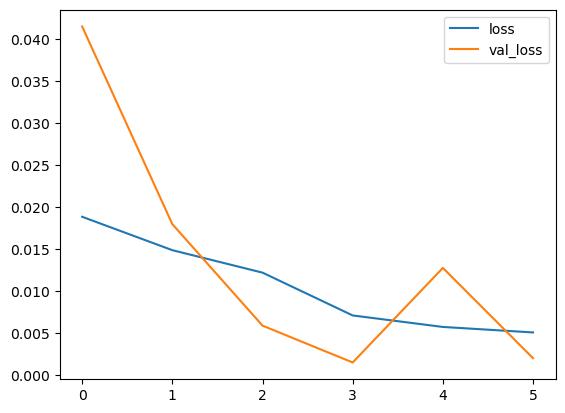

In [16]:
losses.plot()

In [17]:
test=scaled_train_data[-12:].reshape(1,12,1)

In [18]:
Scaler.inverse_transform(model.predict(test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


array([[25482.453]], dtype=float32)

In [19]:
test_data.iloc[0]

Sales    24243.0
Name: 2022-10-01 00:00:00, dtype: float64

In [20]:
prediction=[]
test=scaled_train_data[-12:].reshape(1,12,1)
for i in range(24):
    pred=model.predict(test)
    prediction.append(pred[0])
    test=np.append(test[:,1:,:],[pred],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [21]:
prediction=Scaler.inverse_transform(prediction)

In [22]:
test_data['LSTM Predictions']=prediction

<Axes: xlabel='DATE'>

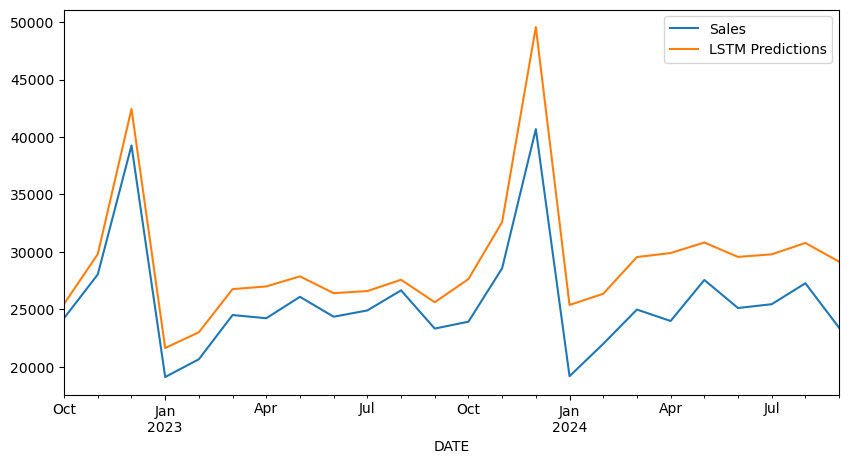

In [23]:
test_data.plot(figsize=(10,5))

In [24]:
#Forecasting
new_scaler=MinMaxScaler()
forecast_data=new_scaler.fit_transform(data)

In [25]:
forecast_gen=TimeseriesGenerator(forecast_data,forecast_data,length=12,batch_size=1)

In [26]:
F_model=Sequential()
F_model.add(Input(shape=(12,1)))
F_model.add(LSTM(units=128,activation='relu'))
F_model.add(Dense(1))

F_model.compile(loss='mse',optimizer='adam')

In [27]:
F_model.fit(forecast_gen,epochs=7)

Epoch 1/7
381/381 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0407
Epoch 2/7
381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0140
Epoch 3/7
381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0101
Epoch 4/7
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0050
Epoch 5/7
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0042
Epoch 6/7
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0031
Epoch 7/7
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0049


In [28]:
forecast=[]

f_data=forecast_data[-12:]
f_data=f_data.reshape(1,12,1)

for i in range(12):
    pred=F_model.predict(f_data)
    forecast.append(pred[0])
    f_data=np.append(f_data[:,1:,:],[pred],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [29]:
forecast = new_scaler.inverse_transform(forecast)

In [30]:
forecast_index = pd.date_range(start='2024-10-01',periods=12,freq='MS')
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

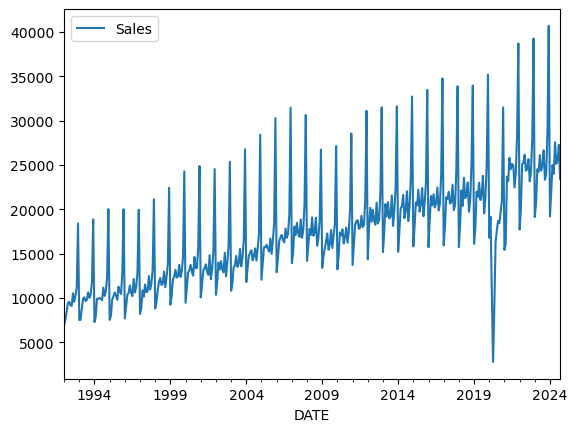

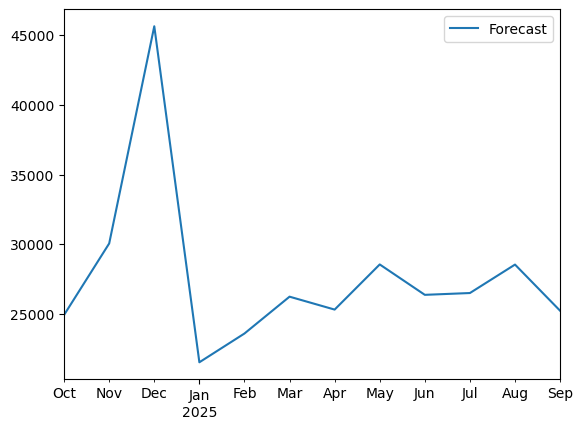

In [31]:
data.plot()
forecast_df.plot()
plt.show()

<Axes: xlabel='DATE'>

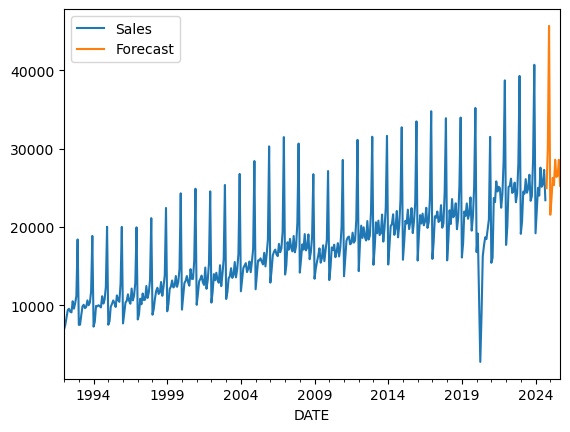

In [32]:
ax = data.plot()
forecast_df.plot(ax=ax)

(576.0, 671.0)

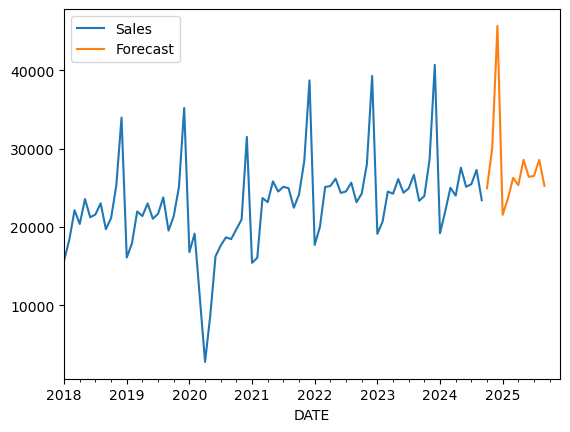

In [33]:
ax = data.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2025-12-01')